In [31]:
import dcor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# References:
# Model-free feature screening for ultrahigh-dimensional data: screening threshold
# Measuring and testing independence by correlation of distances: DC
# Feature screening via distance correlation learning: feature selection

In [46]:
model_name = '10.csl.vavDx.light.singapore.train'
file_loc = './state_correlation_test/' + model_name + '.res.csv';
states_pd = pd.read_csv(file_loc, index_col = 0, skiprows = 3)


In [47]:
states_pd

,Environment,Environment.1,Environment.2,Environment.3,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SW,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SM,2ND%FLOOR%SOUTH:2ND%CONFERENCE%02,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SE,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE,2ND%FLOOR%SOUTH:2ND%CONFERENCE%01,...,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NMW.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SME1.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SME.2,1ST%FLOOR:1ST%RESEARCH%OPEN%NM.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SE.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SM.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE.2,1ST%FLOOR:1ST%RESEARCH%OPEN%NW.2,1ST%FLOOR:1ST%RESEARCH%OPEN%SW.2,1ST%FLOOR:1ST%RESEARCH%OPEN%SM.2
2002/9/1 0:10,25.333333,97.500000,0.0,0.0,22.307805,22.526904,22.922840,22.555122,22.622568,22.509462,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/9/1 0:20,25.666667,95.000000,0.0,0.0,22.352433,22.579894,22.898799,22.606842,22.676114,22.502894,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/9/1 0:30,26.000000,92.500000,0.0,0.0,22.300644,22.537321,22.802287,22.564769,22.539980,22.412372,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/9/1 0:40,26.333333,90.000000,0.0,0.0,22.378026,22.582549,22.930703,22.620089,22.632180,22.546516,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/9/1 0:50,26.666667,87.500000,0.0,0.0,22.344284,22.542203,22.716301,22.579625,22.501600,22.391549,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/9/1 1:00,27.000000,85.000000,0.0,0.0,22.452024,22.751373,22.815953,22.794925,22.751788,22.490081,...,18.560634,18.283003,17.893402,18.434434,17.801026,17.758611,18.210723,18.477722,17.785529,17.677022
2002/9/1 1:10,27.050000,84.833333,0.0,0.0,22.549127,22.825306,22.928798,22.836389,22.792896,22.612663,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520
2002/9/1 1:20,27.100000,84.666667,0.0,0.0,22.616349,22.811046,23.011842,22.818892,22.739639,22.719444,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520
2002/9/1 1:30,27.150000,84.500000,0.0,0.0,22.667075,22.815945,23.111472,22.851007,22.772123,22.810301,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520
2002/9/1 1:40,27.200000,84.333333,0.0,0.0,22.905353,23.108704,23.469062,23.156445,23.113529,23.173330,...,18.283496,18.421516,18.467436,18.705042,18.437381,17.237511,17.795169,17.604030,17.337537,18.595520


In [48]:
states_ay = states_pd.values

In [49]:
states_ay.shape

(13104, 71)

In [50]:
def get_prcd_states_single(states_ay, time_back):
    states_x = states_ay[0:-time_back, :]
    states_y = states_ay[time_back:, :]
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [51]:
single_dcors = [];
for time_i in range(1, 289):
    single_dcors.append(get_prcd_states_single(states_ay, time_i)[2].correlation_xy)

In [52]:
np.savetxt('./state_correlation_test/' + model_name + '.dcor.csv', single_dcors)

In [190]:
def get_aux_states_single(states_ay):
    mean = np.mean(states_ay)
    std = np.std(states_ay)
    states_x = np.random.normal(mean, std, size = states_ay.shape);
    states_y = states_ay;
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

[0.8016253522071883,
 0.7873171491219207,
 0.7703077542490797,
 0.7551750340207193,
 0.7414010228080746,
 0.7240593860542002,
 0.715829371405225,
 0.7057947685851524,
 0.6956599202192877,
 0.6896652708414833,
 0.6841246368088475,
 0.6712753972835629,
 0.6647735477567899,
 0.6546195152784589,
 0.6461279264728554,
 0.639303674408852,
 0.6323198466544463,
 0.6260155184493589,
 0.6178726246224555,
 0.6120599011691382,
 0.6033004731043197,
 0.5986797643552716,
 0.5869712172124221,
 0.5775329807462063,
 0.5694922389066522,
 0.5614984647952289,
 0.5532528397163093,
 0.5449193232207937,
 0.5369406875449284,
 0.5281403538472528,
 0.5215900345753118,
 0.5128137501583305,
 0.5059442439252841,
 0.50230239830879,
 0.49587728647175816,
 0.4870623300751607,
 0.4817490197085945,
 0.47528812979016605,
 0.4680149483328088,
 0.4598441874363587,
 0.4567458250455577,
 0.4502089588551721,
 0.4445782629486727,
 0.4397228605001794,
 0.4316339244663365,
 0.4242593827184057,
 0.41963024915058933,
 0.41290570772

In [197]:
def get_idx_with_thres(dcors, thres):
    idx = 1;
    for dcor in dcors:
        if dcor < thres:
            break;
        idx += 1;
    return idx;

In [207]:
get_idx_with_thres(single_dcors, 0.5)

35

In [158]:
def get_prcd_states_stack(states_ay, time_back):
    states_y = states_ay[time_back:, :];
    states_x = [];
    for line_i in range(states_ay.shape[0]):
        if (states_ay.shape[0] - line_i) >= (time_back + 1):
            states_x.append(states_ay[line_i: line_i + time_back].flatten().tolist());
    states_x = np.array(states_x);
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [160]:
stack_dcors = [];
for time_i in range(1, 144):
    stack_dcors.append(get_prcd_states_stack(states_ay, time_i)[2].correlation_xy)

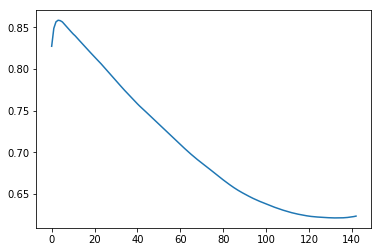

In [195]:
plt.plot(stack_dcors)

In [161]:
stats

Stats(covariance_xy=11907.01607774836, correlation_xy=0.8579947319025889, variance_x=18957.465013247333, variance_y=10159.126645923148)

In [133]:
print(y[0])

[1.80000000e+01 8.30000000e+01 0.00000000e+00 0.00000000e+00
 2.05781797e+01 2.12226612e+01 2.16485287e+01 2.11995969e+01
 2.16648828e+01 2.10401879e+01 2.03378237e+01 2.20062343e+01
 2.03243841e+01 2.19989913e+01 2.09989709e+01 2.11410706e+01
 2.03254045e+01 2.09024775e+01 2.04584599e+01 2.10396796e+01
 2.10433443e+01 1.98943007e+01 2.11819041e+01 2.05219664e+01
 2.09127554e+01 2.00200759e+01 1.94359421e+04 2.74373306e+01
 2.82398407e+01 2.82064900e+01 2.76770225e+01 2.78929448e+01
 2.82710704e+01 2.82830028e+01 2.81405238e+01 2.78934023e+01
 2.71488842e+01 2.77586112e+01 2.84344343e+01 2.89238214e+01
 2.85606338e+01 2.78010264e+01 2.84777223e+01 2.84509423e+01
 2.69096399e+01 2.82507418e+01 2.82107228e+01 2.77855292e+01
 2.83827043e+01 1.74373306e+01 1.89238214e+01 1.82398407e+01
 1.84509423e+01 1.82507418e+01 1.82064900e+01 1.83827043e+01
 1.78929448e+01 1.81405238e+01 1.71488842e+01 1.82710704e+01
 1.69096399e+01 1.85606338e+01 1.82830028e+01 1.78934023e+01
 1.84344343e+01 1.780102